## Tasca M1 T01 Relational Data Bases

*Descripció*

Exercicis amb MySQL.
- **Exercici 1**

A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.


- **Exercici 2**

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.


- **Exercici 3**

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.  


- **Exercici 4**

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.

- **Exercici 5**

Realitza la següent operació sobre la base de dades acabada de crear: 

Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.


- **Exercici 6**

Fes la següent operació sobre la base de dades acabada de crear:  

Elimina la pel·lícula "La Gran Familia Española" de la base de dades.


- **Exercici 7**

Realitza la següent operació sobre la base de dades acabada de crear: 

Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.




In [1]:
## Importing libraries
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## Execice 1
    
<div class="alert alert-block alert-info">From the given documents (estructura i dades), creat a new data base with MySQL.   
Show all the principal characteristics from created scheme AND explain the diferent tables and variables there in.
</div>


I've introduce all the information from the structure and data files into a data base called movies using MySQL workbench.
Bellow are shown two imatges with the diferent tables and variables of each table.

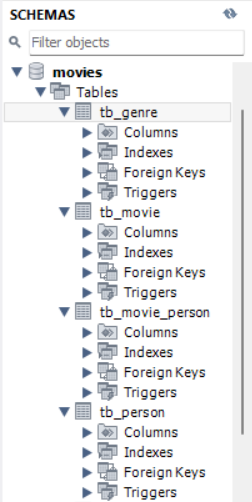

In [12]:
Image('SchemeDBMobies_1.png')

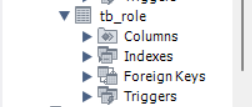

In [14]:
Image('SchemeDBMobies_2.png')

* The movies dataBase has 5 tables:
    *  tb_genre:
        * 5 columns. genre_id as primary key.
    * tb_movies:
        * 8 columns. movie_id as a Primary Key. movie_genre as a Foreing key referencing to the table tb_genre
    * tb_role:
        * 5 columns. role_id as a Primary Key
    * tb_person:
        * 9 columns. person_id as a Primary Key. person_parent as a Foreing Key referencing to the table tb_person.
    * tb_movie_person:
        * 7 columns. movie_id, person_id, role_id are Primary Keys. movie_id, person_id are Foreing keys as well, referencing to tb_movie and tb_person tables, respectively.
     

All primary Keys are which is an integer not null. Since Foreing Keys reference to primary keys they also are integers not nulls.

## Exercice 2

<div class="alert alert-block alert-info">Do the next query from the recently created database:
    
Obtain the name, country and date of birth for the person who do not have a date of death and order them by age from the older to the younger person
</div>

I've used MySQL for the query, using the following command:

    SELECT person_name, person_country, person_dob FROM tb_person  
    WHERE person_dod IS NOT NULL  
    ORDER BY person_dob ASC;}'  
    
Bellow I show an image with the 4 results obteined     

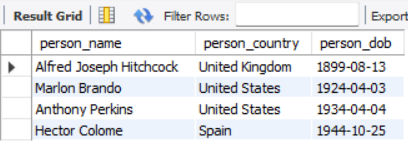

In [20]:
Image('EX02_QueryResult.png')

## Exercice 3

<div class="alert alert-block alert-info">Do the next query from the recently created database:
    
Obtain the name of the genre and the total number of films of this genre and order it by the total number of films, descending
</div>

I've used the following command to do the query:

        SELECT tb_genre.genre_name, count(tb_movie.movie_id) AS NumberOfMovies FROM tb_movie
        INNER JOIN tb_genre ON tb_movie.movie_genre_id=tb_genre.genre_id
        GROUP BY tb_genre.genre_id
        ORDER BY count(tb_movie.movie_id) DESC;
        
- The first column of my selection would be genre name from the genre table and the second column is a count of the number of movies id from the movies table, whcih I called it with the AS NumberOfMovies.

- Since what I want is in 2 different tables, tb_movie and tb_genre, I used an INNER JOIN relating them with the genre ID. 

- I group by genre id to obtain the column with all the unic values of genre.
- Finnaly, I used Order by the count of number of movies for each genre descending. This order was unnecessary, it did it automatically

Bellow I show an image of the result:

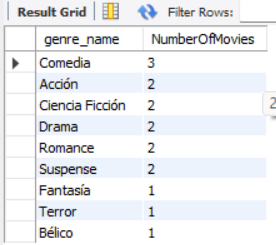

In [21]:
Image('EX03_QueryResult.png')

## Exercici 4

<div class="alert alert-block alert-info">Do the next query from the recently created database:
    
Obtain, for each person, their name and the maximum number of different roles performed in each movie.

Then, show just those persons who has done more than 1 role in 1 same movie.
</div>

- With the following code I obtain for each person their name, id of film and maximum number of roles, howevere I am not able to group by name of the person

    - SELECT tb_person.person_name, tb_movie_person.movie_id, count(tb_movie_person.role_id) AS maxRoles       
      FROM tb_movie_person      
      LEFT JOIN tb_person ON tb_person.person_id = tb_movie_person.person_id     
      GROUP BY tb_person.person_name, tb_movie_person.movie_id     



- With the following query, I obtain directly the maximum number of roles for each person with more than 1 role per movie, and the movie id where this happends, ordered descending by the maximum number of roles:

    - SELECT tb_person.person_name, tb_movie_person.movie_id, count(tb_movie_person.role_id) AS maxRoles     
      FROM tb_movie_person    
      LEFT JOIN tb_person ON tb_person.person_id = tb_movie_person.person_id   
      GROUP BY tb_movie_person.movie_id, tb_person.person_name   
      HAVING maxRoles > 1   


See bellow an image of the query result:

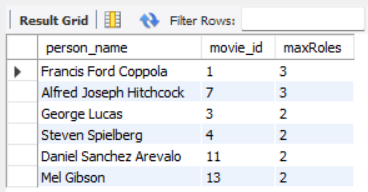

In [3]:
Image('EX04A_QueryResult.png')

## Exercici 5

<div class="alert alert-block alert-info">Do the next query from the recently created database:

Creat a new genre called 'Documental? with id the number 69.
</div>

I used the following query to insert the new genre:

INSERT INTO movies.tb_genre (genre_id, genre_name) VALUES ( 69, 'Documental');

and this to show the table tho check the new genre was introduced:

SELECT genre_id, genre_name FROM tb_genre


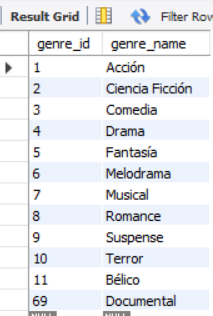

In [4]:
Image('EX05_QueryResult.png')

## Exercici 6

<div class="alert alert-block alert-info">Do the next query from the recently created database:

Eliminate the movie "La Gran Familia Española" from the data base
</div>


I used this code to do the query:

DELETE FROM movies.tb_movie WHERE tb_movie.movie_title = 'La Gran Familia Española'

To delet a movie that has a Primary Key and is a Foreing Key for other tables I need to Delet on Cascade, só the item is deleted in all tables. Since when I introduced the tables I didn't configure the foreing Keys as Delet or Update on Cascade, I need to altere the table.

**Step 1:** First I get the foreing Key name to see if I can Delet ON CASCADE. I sure this command:  

- SHOW CREATE TABLE tb_movie_person;

        
- tb_movie_person	CREATE TABLE `tb_movie_person` (     
  `movie_id` int NOT NULL,   
  `person_id` int NOT NULL,   
  `role_id` int NOT NULL,   
  `movie_award_ind` char(1) NOT NULL,   
  `created_by_user` varchar(10) NOT NULL DEFAULT 'OS_SGAD',   
  `created_date` date DEFAULT NULL,   
  `updated_date` date DEFAULT NULL,   
  PRIMARY KEY (`movie_id`,`person_id`,`role_id`),    
  KEY `fk_movper_person` (`person_id`),   
  KEY `fk_movper_role` (`role_id`),    
  CONSTRAINT `fk_movper_movie` FOREIGN KEY (`movie_id`) REFERENCES `tb_movie` (`movie_id`),   
  CONSTRAINT `fk_movper_person` FOREIGN KEY (`person_id`) REFERENCES `tb_person` (`person_id`),    
  CONSTRAINT `fk_movper_role` FOREIGN KEY (`role_id`) REFERENCES `tb_role` (`role_id`)   
    ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci   


We see that no foreing Key is defined as Delet or Update on Cascade       
        
**Step 2:** We need to DROP Foreing Key to be able to define it again with the Cascade. I sure this command, and show it again:


- alter table tb_movie_person add foreign key (movie_id) references tb_movie(movie_id) on DELETE CASCADE


- tb_movie_person	CREATE TABLE `tb_movie_person` (    
  `movie_id` int NOT NULL,   
  `person_id` int NOT NULL,    
  `role_id` int NOT NULL,    
  `movie_award_ind` char(1) NOT NULL,    
  `created_by_user` varchar(10) NOT NULL DEFAULT 'OS_SGAD',   
  `created_date` date DEFAULT NULL,   
  `updated_date` date DEFAULT NULL,   
  PRIMARY KEY (`movie_id`,`person_id`,`role_id`),   
  KEY `fk_movper_person` (`person_id`),    
  KEY `fk_movper_role` (`role_id`),   
  CONSTRAINT `fk_movper_person` FOREIGN KEY (`person_id`) REFERENCES `tb_person` (`person_id`),   
  CONSTRAINT `fk_movper_role` FOREIGN KEY (`role_id`) REFERENCES `tb_role` (`role_id`),   
  CONSTRAINT `tb_movie_person_ibfk_1` FOREIGN KEY (`movie_id`) REFERENCES `tb_movie` (`movie_id`) ON DELETE CASCADE   
    ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci   



Now, we proced to delete on Cascade the movie "La Gran Familia Española"


**Step 3:** First I check the id of the film to make it easier
- SELECT movie_id FROM tb_movie WHERE movie_title = "La Gran Familia Española"
    and i get id = 11
    
    
**Step 4:** I delet the item with id = 11 with the following code:
- DELETE FROM tb_movie WHERE movie_id = 11;

**Step 5:** And check if the itm is still there with:
- SELECT movie_id, movie_title FROM tb_movie;

- See the folllowing image, NOT there!! :)

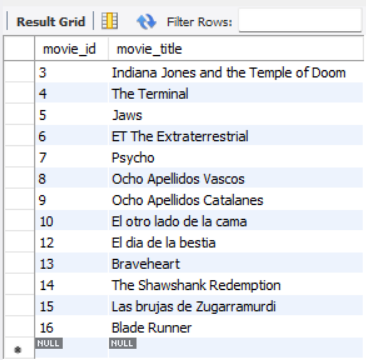

In [2]:
Image('EX06_QueryResult.png')

## Exercici 7

<div class="alert alert-block alert-info">Do the next query from the recently created database:

Change the genre of the movie "Ocho apellidos catalanes" from 'romantica' to 'comedia'
</div>


- First I have checked the id numbers of each element I'm interested in
    - id romance = 8
    - id comedia = 3
    - id "Ocho apellidos catalanes" = 9


- I use the following command:

    - UPDATE tb_movie   
        SET movie_genre_id = '3'  
        WHERE movie_id = 9   
        
        
- <div class="alert alert-block alert-warning">WHat I MUST remember: In the WHERE statement you MUST put a PRIMARY KEY</div>

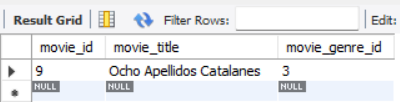

In [3]:
Image('EX07_QueryResult.png')